# Classification and Regression with XGBoost

## Classification with XGBoost
XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.  
What makes XGBoost so popular is that it consistently out-preforms almost all other single-algorithm methods in machine learning competitions and has been shown to achieve state-of-the-art performance on a variety of benchmark machine learning datasets.  
It was developed originally as a C++ command-line application. After winning a popular machine learning competition, the package started being adopted within the ML community. As a result, bindings, or functions that tapped into the core C++ code, started appearing in a variety of other languages, including Python, R, Scala, and Julia.  
XGBoost provides binary packages for some language bindings. The binary packages support the GPU algorithm (gpu_hist) on machines with NVIDIA GPUs. Please note that training with multiple GPUs is only supported for Linux platform. 
  
- Core algorithm in XGBoost is **parallelizable** (CPU's, GPU's, Multi-Node)
---
Code Example:
```
# Imports
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load Data
class_data = pd.read_csv("classification_data.csv")

# X/y Split
X, y = class_data.iloc[:,:-1], class_data.iloc[:,-1]

# Train/Test Split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate
xg_cl = xgb.XGBClassifier(objective='binary:logistic',n_estimators=10, seed=123)

# Fit Model to Training Data
xg_cl.fit(X_train, y_train)

# Predict
preds = xg_cl.predict(X_test)

# Compute Accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]

# Display Accuracy
print("accuracy: %f" % (accuracy))

# Terminal Output
accuracy: 0.78333
```
---
AUC: Metric for binary classification models
- The AUC, or Area Under the Receiver Operating Characteristic Curve, is the most versatile and common evaluation metric used to judge the quality of a binary classification model. It is simply the probability that a randomly chosen positive data point will have a higher rank than a randomly chosen negative data point for your learning problem. So, a higher AUC means a more sensitive, better performing model.
  
Accuracy score: Metric for multi-classification models
- When dealing with multi-class classification problems, it is common to use the accuracy score (higher is better) and to look at the overall confusion matrix to evaluate the quality of a model.

### XGBoost - Fit/Predict
This dataset contains imaginary data from a ride-sharing app with user behaviors over their first month of app usage in a set of imaginary cities as well as whether they used the service 5 months after sign-up.

The goal is to use the first month's worth of data to predict whether the app's users will remain users of the service at the 5 month mark. This is a typical setup for a churn prediction problem.

In [1]:
# pip3 install numpy
import numpy as np
# pip3 install pandas
import pandas as pd
# pip3 install scikit-learn
from sklearn.model_selection import train_test_split
# pip3 install xgboost
import xgboost as xgb



# Load data
churn_data = pd.read_csv('../_datasets/churn_data.csv')

# Create arrays for the features and the target: X, y
X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Seed
SEED = 123

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=SEED)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=SEED)

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.758200


### Decision Tree
This dataset contains numeric measurements of various dimensions of individual tumors (such as perimeter and texture) from breast biopsies and a single outcome value (the tumor is either malignant, or benign).

In [2]:
# pip3 install numpy
import numpy as np
# pip3 install pandas
import pandas as pd
# pip3 install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# Load Data
X = pd.read_csv('../_datasets/xgb_breast_X.csv').to_numpy()
y = pd.read_csv('../_datasets/xgb_breast_y.csv').to_numpy().ravel()  # .ravel() is equivalent to reshape(-1, order=order)

# Seed
SEED = 123

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth=4)

# Fit the classifier to the training set
dt_clf_4.fit(X_train, y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4 == y_test)) / y_test.shape[0]
print("Accuracy:", accuracy)

Accuracy: 0.9736842105263158


### What is Boosting?

Boosting overview  
- Not a specific machine learning algorithm
- Concept that can be applied to a set of machine learning models
- "Meta-algorithm"
- Ensemble meta-algorithm used to convert many weak learners into a strong learner  
  
Weak learners and strong learners
- Weak learner: ML algorithm that is slightly better than chance
- Boosting converts a collection of weak learners into a strong learner
- Strong learner: Any algorithm that can be tuned to achieve good performance.
  
How boosting is accomplished?  
- Iteratively learning a set of week models on subsets of the data
- Weighting each weak prediction according to each weak learner's performance
- Combine the weighted predictions to obtain a single weighted prediction that is much better than the individual predictions themselves!
  
Model evaluation through cross-validation  
- Cross-validation: Robust method for estimating the performance of a model on unseen data
- Generates many non-overlapping train/test splits on training data
- Reports the average test set performance across all data splits

### Measuring Accuracy
Using XGBoost's learning API through its baked in cross-validation capabilities. XGBoost gets its lauded performance and efficiency gains by utilizing its own optimized data structure for datasets called a DMatrix. 
Before, the input dataset was converted into a DMatrix datatype on the fly, but **when you use the xgboost cv object, you have to first explicitly convert your data into a DMatrix**. So, that's what we will do here before running cross-validation on churn_data.

In [3]:
import pandas as pd
import xgboost as xgb


# Load data
churn_data = pd.read_csv('../_datasets/churn_data.csv')

# Seed
SEED = 123

# Create arrays for the features
X, y = churn_data.iloc[:, :-1], churn_data.iloc[:, -1]

# Create the DMatrix from X and y
churn_dmatrix = xgb.DMatrix(data= X, label= y)

# Create the parameter dictionary for xgb
params = {
    'objective' : 'reg:logistic',
    'max_depth' : 3
}

# Preform cross-validation
cv_results = xgb.cv(
    dtrain= churn_dmatrix,  # dtrain is the churn_dmatrix
    params= params,         # params is the parameter dictionary
    nfold= 3,               # nfold is the number of cross-validation folds
    num_boost_round= 5,     # num_boost_round is the number of trees we want to build
    metrics= 'error',       # metrics is the metric you want to compute
    as_pandas= True,
    seed= SEED
)

# Print cv_results
print(cv_results)

# Print accuracy
print(((1 - cv_results['test-error-mean']).iloc[-1]))

   train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.28232         0.002366          0.28378        0.001932
1           0.26951         0.001855          0.27190        0.001932
2           0.25605         0.003213          0.25798        0.003963
3           0.25090         0.001844          0.25434        0.003827
4           0.24654         0.001981          0.24852        0.000934
0.751480015401492


cv_results stores the training and test mean and standard deviation of the error per boosting round (tree built) as a DataFrame. From cv_results, the final round 'test-error-mean' is extracted and converted into an accuracy, where accuracy is 1-error. The final accuracy of around 75% is an improvement from earlier.

### Measuring AUC

In [4]:
import pandas as pd
import xgboost as xgb


# Load data
churn_data = pd.read_csv('../_datasets/churn_data.csv')

# Seed
SEED = 123

# Create arrays for the features
X, y = churn_data.iloc[:, :-1], churn_data.iloc[:, -1]

# Create the DMatrix from X and y
churn_dmatrix = xgb.DMatrix(data= X, label= y)

# Create the parameter dictionary for xgb
params = {
    'objective' : 'reg:logistic',
    'max_depth' : 3
}

# Preform cross-validation
cv_results = xgb.cv(
    dtrain= churn_dmatrix,  # dtrain is the churn_dmatrix
    params= params,         # params is the parameter dictionary
    nfold= 3,               # nfold is the number of cross-validation folds
    num_boost_round= 5,     # num_boost_round is the number of trees we want to build
    metrics= 'auc',       # metrics is the metric you want to compute
    as_pandas= True,
    seed= SEED
)

# Print cv_results
print(cv_results)

# Print accuracy
print((cv_results['test-auc-mean']).iloc[-1])

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.768893       0.001544       0.767863      0.002819
1        0.790864       0.006758       0.789156      0.006846
2        0.815872       0.003900       0.814476      0.005997
3        0.822959       0.002018       0.821682      0.003912
4        0.827528       0.000769       0.826191      0.001937
0.8261911413597645


An AUC of 0.84 is quite strong. XGBoost's learning API makes it very easy to compute any metric you may be interested in.

### When to use XGBoost?
XGBoost tends to do well when you have a mixture of categorical and numeric features, or when you have just numeric features. You should consider using XGBoost for any supervised machine learning task that fits the following criteria:  
- Greater than 1000 training samples and less than 100 features
- The number of features < number of training samples
  
### When to not use XGBoost?
The most important kinds of problems where XGBoost is a suboptimal choice involve either those that have found success using other state-of-the-art algorithms or those that suffer from dataset size issues. Specifically, XGBoost is not ideally suited for: 
- image recognition
- computer vision
- natural language processing and understanding problems
- less than 100 training samples
- training examples are significantly smaller than training features

Example of when to use XGBoost: Predicting the likelihood that a given user will click an ad from a very large clickstream log with millions of users and their web interactions.

## Regression with XGBoost
  
### Regression review
Common regression metrics:
- Root Mean Squared Error (RMSE)
- Mean Absolute Erro (MAE)
  
### Objective (loss) functions and base learners
Objective functions and Why we use them:
- Quantifies how far off a prediction is from the actual result
- Measures the difference between estimated and true values for some collection of data
- Goal: Find the model that yields the minimum value of the loss function
  
### Common loss functions and XGBoost
Loss function names in xgboost:
- reg:linear - use for regression problems
- reg:logistic - use for classification problems when you want just decision, not probability
- binary:logistic - use when you want probability rather than just decision
  
### Base learners and why we need them
- XGBoost involves creating a meta-model that is composed of many individual models that combine to give a final prediction
- Individual models = base learners
- Want base learners that when combined create a final prediction that is **non-linear**
- Each base learner should be good at distinguishing or predicting different parts of the dataset
- Two kinds of base learners: tree and linear

### Decision trees as base learners

In [5]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Load data
df = pd.read_csv('../_datasets/ames_housing_trimmed_processed.csv')

# Create X,y split
X, y = df.iloc[:, :-1], df.iloc[:, -1]

# Seed
SEED = 123

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Instantiate the XGBRegressor
# reg:linear is now deprecated in favor of reg:squarederror.
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', seed= SEED, n_estimators= 10)

# Fit the model
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set
preds = xg_reg.predict(X_test)

# Compute the RMSE
rmse = np.sqrt(mean_squared_error(y_test, preds))

# Display RMSE
print('RMSE: {}'.format(rmse))

RMSE: 28106.463640605285


### Linear base learners
Let's use the other kind of base model that can be used with XGBoost - a linear learner. This model, although not as commonly used in XGBoost, allows you to create a regularized linear regression using XGBoost's powerful learning API. However, because it's uncommon, you have to use XGBoost's own non-scikit-learn compatible functions to build the model, such as xgb.train().  
In order to do this, you must create the parameter dictionary that describes the kind of booster you want to use (similarly to how you created the dictionary with xgb.cv()). The key-value pair that defines the booster type (base model) you need is "booster":"gblinear".  
  
Once you've created the model, you can use the .train() and .predict() methods of the model just like you've done in the past.

In [6]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Load data
df = pd.read_csv('../_datasets/ames_housing_trimmed_processed.csv')

# Create X,y split
X, y = df.iloc[:, :-1], df.iloc[:, -1]

# Seed
SEED = 123

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Converting the training and testing sets into DMatrixes
DM_train = xgb.DMatrix(data= X_train, label= y_train)
DM_test = xgb.DMatrix(data= X_test, label= y_test)

# Creating the parameter dictionary
params = {
    'booster' : 'gblinear',
    'objective' : 'reg:squarederror',
}

# Training model
xg_reg = xgb.train(params= params, dtrain= DM_train, num_boost_round= 5)

# Predicting the labels of the test set
preds = xg_reg.predict(DM_test)

# Compute and print RMSE
rmse = np.sqrt(mean_squared_error(y_test, preds))
print('RMSE: {}'.format(rmse))

RMSE: 44287.59125859454


### Evaluating model quality
Comparing the RMSE and MAE of a cross-validated XGBoost model on the Ames housing data.

In [7]:
import pandas as pd
import xgboost as xgb


# Load data
df = pd.read_csv('../_datasets/ames_housing_trimmed_processed.csv')

# Create X,y split
X, y = df.iloc[:, :-1], df.iloc[:, -1]

# Seed
SEED = 123

# Creating the DMatrix
housing_dmatrix = xgb.DMatrix(data=X, label= y)

params = {
    'objective' : 'reg:squarederror',
    'max_depth' : 4
}

# Preform cross-validation
cv_results = xgb.cv(
    dtrain= housing_dmatrix,
    params= params,
    nfold= 4,
    num_boost_round= 5,
    metrics= 'rmse',
    as_pandas= True,
    seed= SEED
)

# Display cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results['test-rmse-mean']).tail(1))

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    141767.533478      429.451090   142980.434934    1193.795492
1    102832.547530      322.472076   104891.395389    1223.157368
2     75872.617039      266.474211    79478.938743    1601.345019
3     57245.651780      273.624239    62411.921348    2220.150063
4     44401.298519      316.423620    51348.279619    2963.378136
4    51348.279619
Name: test-rmse-mean, dtype: float64


In [8]:
# Create the DMatrix
housing_dmatrix = xgb.DMatrix(data=X, label= y)

# Create the parameter dictionary
params = {
    'objective' : 'reg:squarederror',
    'max_depth' : 4
}

# Preforming cross-validation
cv_results = xgb.cv(
    dtrain= housing_dmatrix,
    params= params,
    nfold= 4,
    num_boost_round= 5,
    metrics= 'mae',
    as_pandas= True,
    seed= SEED
)

# Display cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results['test-mae-mean']).tail(1))

   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0   127343.480012     668.306786  127633.999275   2404.005913
1    89770.056424     456.963854   90122.501070   2107.909841
2    63580.789280     263.405054   64278.558741   1887.567534
3    45633.156501     151.883868   46819.168555   1459.818435
4    33587.090044      86.998100   35670.647207   1140.607311
4    35670.647207
Name: test-mae-mean, dtype: float64


## Regularization and base learners in XGBoost
  
Regularization in XGBoost
- Regularization is a control on model complexity
- Want models that are both accurate and as simple as possible
  
Regularization parameters in XGBoost:
- gamma - minimum loss reduction allowed for a split to occur. Gamma is a parameter for tree base learners that controls whether a given node on a base learner will split based on the expected reduction in the loss that would occur after performing the split, so that higher values lead to fewer splits.  
  
- alpha - L1 regularization on leaf weights, larger values mean more regularization. Alpha is another name for L1 regularization. However, this regularization term is a penalty on leaf weights rather than on feature weights, as is the case in linear or logistic regression. Higher alpha values lead to stronger L1 regularization, which causes many leaf weights in the base learners to go to 0.  
  
- lambda - L2 regularization on leaf weights. Lambda is another name for l2 regularization. L2 regularization is a much smoother penalty that l1 and causes leaf weights to smoothly decrease, instead of enforcing strong sparsity constraints on the leaf weights as in l1.
  
Base learners in XGBoost:
- Linear Base learner
- Tree Base learner
  
Linear Base learner:
- Sum of linear terms
- Boosted model is weighted sum of linear models (thus is itself linear)
- Rarely used
  
Tree Base learner:
- Decision tree
- Boosted model is weighted sum of decision trees (nonlinear)
- Almost exclusively used in XGBoost

### Using regularization in XGBoost
Trying the l2 regularization penalty - also known as "lambda" - and seeing its effect on overall model performance on the Ames housing dataset.
  
zip() creates a generator of parallel values:
- zip([1,2,3],['a','b','c']) = [1,'a'], [2,'b'], [3,'c']  
  
We will be using this to take our reg_params (list1) and our rmses_l2 (list2), combining them, then passing them into a single list object. Afterwards passing the object as the 'data' argument in pd.DataFrame(). The columns argument will be the names that we want for list1 and list2 respectively.

In [9]:
import pandas as pd
import xgboost as xgb


# Load data
df = pd.read_csv('../_datasets/ames_housing_trimmed_processed.csv')

# Create X,y split
X, y = df.iloc[:, :-1], df.iloc[:, -1]

# Seed
SEED = 123

# Creating the DMatrix
housing_dmatrix = xgb.DMatrix(data= X, label= y)

# Creating the initial parameter dictionary for varying l2 strength
params = {
    'objective' : 'reg:squarederror',
    'max_depth' : 3
}

# Creating loop-able params to evaluate
reg_params = [1, 10, 100]

# Creating empty list for storing RMSE's as a function of l2 complexity, lambda
rmses_l2 = []

# Iterating over reg_params
for reg in reg_params:
    
    # Update l2 strength
    params['lambda'] = reg

    # Pass this new updated parameter dictionary into cv (appending params with lambda each iter)
    cv_results_rmse = xgb.cv(
        dtrain= housing_dmatrix,
        params= params,  # This is what gets updated
        nfold=2,
        num_boost_round= 5,
        metrics= 'rmse',
        as_pandas= True,
        seed= SEED
    )

    # Append best rmse (final round) to rmses_l2
    # The values attribute is used to retrieve the underlying NumPy array of the selected row.
    # Since we are only selecting one row (i.e., the last row) using tail(1), this will return a NumPy array with only one element. 
    # We then use [0] to extract this single element from the array.
    rmses_l2.append(cv_results_rmse['test-rmse-mean'].tail(1).values[0])

# Looking at best rmse per l2 param
print('Best rmse as a function of l2:')
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns= ['l2', 'rmse']))

Best rmse as a function of l2:
    l2          rmse
0    1  52275.357003
1   10  57746.063828
2  100  76624.627811


The lower the RMSE, the better the model and its predictions. A higher RMSE indicates that there is a large deviation from the residual to the ground truth. RMSE can be used with different features as it helps in figuring out if the feature is improving the model's prediction or not.

### Visualizing individual XGBoost trees
XGBoost has a plot_tree() function that makes this type of visualization easy. Once you train a model using the XGBoost learning API, you can pass it to the plot_tree() function along with the number of trees you want to plot using the num_trees argument.

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from graphviz import Source, Digraph



# Load data
df = pd.read_csv('../_datasets/ames_housing_trimmed_processed.csv')

# X/y Split
X, y = df.iloc[:, :-1], df.iloc[:, -1]

# Creating the DMatrix
housing_dmatrix = xgb.DMatrix(data= X, label= y)

# Creating parameters
params = {
    'objective' : 'reg:squarederror',
    'max_depth' : 2
}

# Train the model
xg_reg = xgb.train(
    dtrain= housing_dmatrix,
    params= params, 
    num_boost_round= 10
)

# Plot the first tree
a = xgb.to_graphviz(xg_reg, num_trees= 0)
graph = Source(a)
graph
plt.show()

# Plot the fifth tree
b = xgb.to_graphviz(xg_reg, num_trees= 4)
graph = Source(b)
graph
plt.show()

# Plot the last tree sideways
c = xgb.to_graphviz(xg_reg, num_trees= 9, rankdir='LR')
graph = Digraph(c)
graph
plt.show()


### Visualizing feature importances: What features are most important in my dataset
Another way to visualize your XGBoost models is to examine the importance of each feature column in the original dataset within the model.  
  
One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a plot_importance() function that allows you to do exactly this

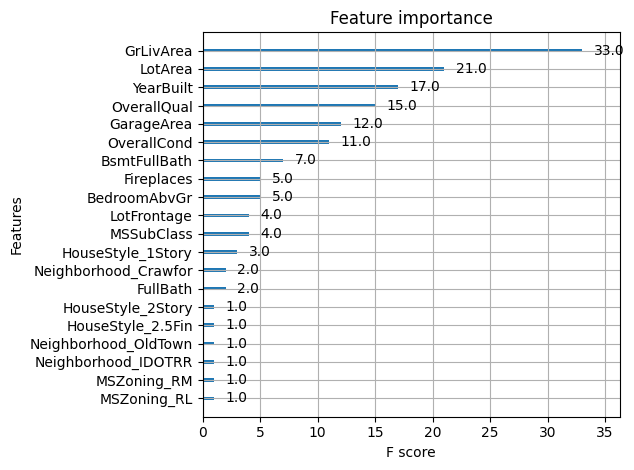

In [11]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(dtrain=housing_dmatrix, params=params, num_boost_round=10)

# Plot the feature importance
xgb.plot_importance(xg_reg)
plt.tight_layout()